In [1]:
import xarray as xr
from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline 

In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler
from statsmodels.tsa.stattools import adfuller, kpss

In [3]:
f = xr.open_dataset("TS_cmems_reanalysis_temperature_from1987to2019_AdriaticSea.nc")

In [4]:
print(f)

<xarray.Dataset>
Dimensions:  (time: 12053)
Coordinates:
  * time     (time) datetime64[ns] 1987-01-01T12:00:00 ... 2019-12-31T12:00:00
    depth    float32 ...
Data variables:
    thetao   (time) float32 ...


In [5]:
temp=f.thetao

In [6]:
#k=xr.DataArray(f.dtype.str[2])
#xr.DataArray(f.dtype.name)
#k

uu=f["time.season"]
uu

<xarray.DataArray 'season' (time: 12053)>
array(['DJF', 'DJF', 'DJF', ..., 'DJF', 'DJF', 'DJF'], dtype='<U3')
Coordinates:
  * time     (time) datetime64[ns] 1987-01-01T12:00:00 ... 2019-12-31T12:00:00
    depth    float32 ...

In [7]:
f

<xarray.Dataset>
Dimensions:  (time: 12053)
Coordinates:
  * time     (time) datetime64[ns] 1987-01-01T12:00:00 ... 2019-12-31T12:00:00
    depth    float32 1.018
Data variables:
    thetao   (time) float32 ...

In [8]:
uu[:2]

<xarray.DataArray 'season' (time: 2)>
array(['DJF', 'DJF'], dtype='<U3')
Coordinates:
  * time     (time) datetime64[ns] 1987-01-01T12:00:00 1987-01-02T12:00:00
    depth    float32 1.018

In [9]:
#width_inch = 16
#height_inch = 8

title_fontstyle = {
    "fontsize": "14",
    "fontstyle": "italic",
    "fontweight": "bold",
    "pad": 30
}



In [10]:
rcParams['figure.figsize'] = 18, 5
rcParams['lines.linewidth'] = 3

In [11]:
kk=f.groupby("time.season").mean()

<xarray.DataArray 'season' (season: 4)>
array(['DJF', 'JJA', 'MAM', 'SON'], dtype=object)
Coordinates:
    depth    float32 1.018
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'


Text(0.5, 1.0, 'ADRIATIC SEA PHYSICS REANALYSIS\nMEAN Temperature [{degree_C}] per Season')

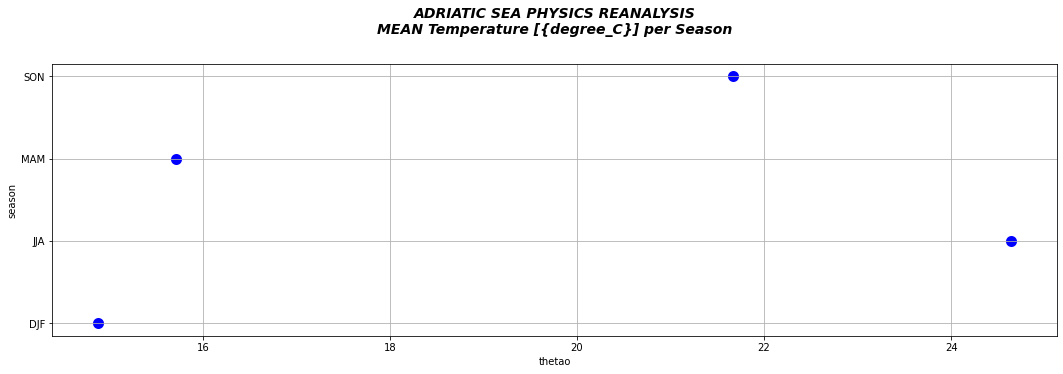

In [12]:
print(kk.season)
plt.grid()

tt=kk.plot.scatter(x="thetao", y="season",color='b', linewidth=5)
title = "ADRIATIC SEA PHYSICS REANALYSIS\nMEAN Temperature [{degree_C}] per Season"

plt.title(title, **title_fontstyle)